In [1]:
from functools import partial
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from bounded_rand_walkers.shaper_generation import circle_shaper, square_shaper

mpl.rc_file("matplotlibrc")

Path("plots").mkdir(exist_ok=True)

/home/alexander/Documents/other/bounded-rand-walkers/src/bounded_rand_walkers/shaper_generation.py:192: RuntimeWarning: invalid value encountered in arccos
  out = 2 * np.arccos(distance / 2) - (1 / 2) * ((4 - x_2 - y_2) * (x_2 + y_2)) ** 0.5
/home/alexander/Documents/other/bounded-rand-walkers/src/bounded_rand_walkers/shaper_generation.py:192: RuntimeWarning: invalid value encountered in sqrt
  out = 2 * np.arccos(distance / 2) - (1 / 2) * ((4 - x_2 - y_2) * (x_2 + y_2)) ** 0.5


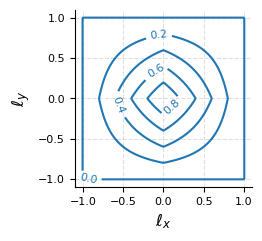

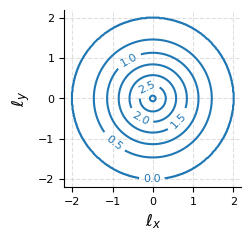

In [2]:
for shaper_func, name, lim, levels in zip(
    [partial(square_shaper, side_length=1), circle_shaper],
    ["square_contour", "circle_contour"],
    [1.1, 2.2],
    [np.arange(0, 1, 0.2), np.arange(0, 4, 0.5)],
):
    n_bins = 300
    xlim = ylim = (-lim, lim)
    grid_x, grid_y = np.meshgrid(np.linspace(*xlim, n_bins), np.linspace(*ylim, n_bins))
    shaper = shaper_func(grid_x, grid_y)

    fig, ax = plt.subplots(figsize=(2.6, 2.3))

    CS = ax.contour(grid_x, grid_y, shaper, levels=levels, colors="C0")
    ax.clabel(CS, levels, fmt="%1.1f")
    ax.axis("scaled")
    ax.set_xlabel(r"$\ell_x$")
    ax.set_ylabel(r"$\ell_y$")

    # Hide the spinese on the right and top.
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    fig.savefig((Path("plots") / name).with_suffix(".pdf"))